In [2]:
import numpy as np
fr = np.load('fruits_300.npy')

In [3]:
# PCA  주성분 분석
from sklearn.decomposition import PCA

In [6]:
fr2d = fr.reshape(300,-1)

In [19]:
pca = PCA(n_components=50)
fr2d_pca =  pca.fit_transform(fr2d)

In [20]:
pca.components_.shape

(50, 10000)

In [21]:
pca.components_[0].reshape(100,100)

array([[9.24490195e-06, 5.10601298e-06, 8.91640398e-06, ...,
        3.64260921e-06, 9.34252918e-07, 4.67126459e-06],
       [1.15833514e-05, 5.76383497e-07, 4.14828737e-06, ...,
        0.00000000e+00, 9.02785432e-07, 0.00000000e+00],
       [5.83134163e-06, 2.29451889e-06, 1.61700364e-06, ...,
        0.00000000e+00, 4.60832962e-06, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

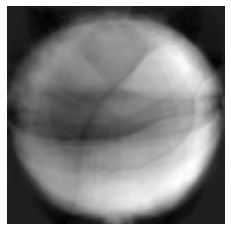

In [22]:
import matplotlib.pyplot as plt
plt.imshow(pca.components_[0].reshape(100,100), cmap='gray_r')
plt.axis('off')
plt.show()

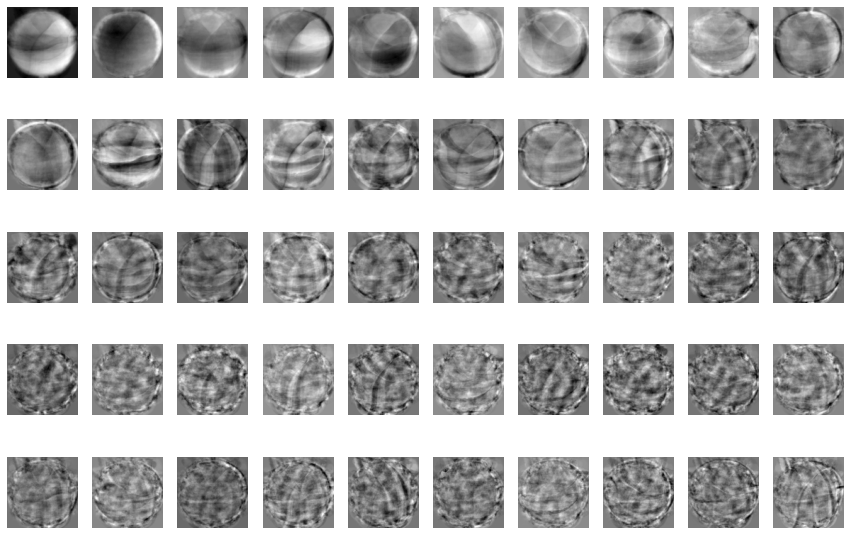

In [18]:
_,axs = plt.subplots(5,10,figsize=(15,10))
idx = 0
for i in range(5):
    for j in range(10):
        axs[i,j].imshow(pca.components_[idx].reshape(100,100), cmap='gray_r')
        axs[i,j].axis('off')
        idx += 1
plt.show()

In [25]:
fr2d_pca.shape, fr2d.shape

((300, 50), (300, 10000))

In [26]:
# 확인
fr_trans= pca.inverse_transform(fr2d_pca)
fr_trans.shape

(300, 10000)

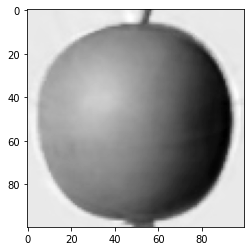

In [28]:
fr_trans[0].reshape(100,100)
plt.imshow(fr_trans[0].reshape(100,100),cmap='gray_r')

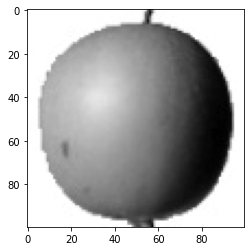

In [29]:
plt.imshow(fr[0].reshape(100,100),cmap='gray_r')

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [31]:
target = np.array([0]*100 + [1]*100+[2]*100 ) #[0,0,0, ... ,1,1,1, .. 2,2,2,2 ]
target.shape

(300,)

In [38]:
from sklearn.model_selection import cross_validate
scores =  cross_validate(lr, fr2d,target,return_train_score=True)

In [39]:
np.mean(scores['test_score']), np.mean(scores['train_score']),np.mean(scores['fit_time'])

(0.9966666666666667, 1.0, 0.593990707397461)

In [41]:
scores =  cross_validate(lr, fr2d_pca,target,return_train_score=True)
np.mean(scores['test_score']), np.mean(scores['train_score']),np.mean(scores['fit_time'])

(1.0, 1.0, 0.014362812042236328)

In [42]:
from sklearn.cluster import KMeans

In [43]:
km =  KMeans(n_clusters=3, random_state=42)
fr2d_pca_km =  km.fit_transform(fr2d_pca)

In [45]:
fr2d_pca_km.shape

(300, 3)

In [48]:
np.unique( km.labels_,return_counts=True)

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))

In [51]:
fr2d_pca[km.labels_ == 0].shape

(111, 50)

In [53]:
pca = PCA(n_components=2)
fr2d_n2 =  pca.fit_transform(fr2d)
pca.n_components

2

In [54]:
fr2d_n2.shape

(300, 2)

In [55]:
km =  KMeans(n_clusters=3, random_state=42)
km.fit(fr2d_n2)

KMeans(n_clusters=3, random_state=42)

In [56]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
fr2d_n2.shape

(300, 2)

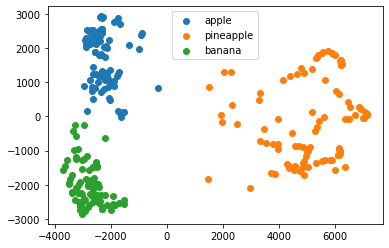

In [60]:
for i in range(3):
    data = fr2d_n2[km.labels_ == i]
    plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','pineapple','banana'])    
plt.show()

In [61]:
scores =  cross_validate(lr, fr2d_n2,target,return_train_score=True)
np.mean(scores['test_score']), np.mean(scores['train_score']),np.mean(scores['fit_time'])

C:\Users\user\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

(0.9933333333333334, 1.0, 0.020836925506591795)

In [63]:
# 인공신경망.. 
# 패선 mnist
!pip install tensorflow

  Using cached tensorflow-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
     ------------------------------------- 895.7/895.7 kB 28.6 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 56.2 MB/s eta 0:00:00
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 2.6/2.6 MB 55.8 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
     ---------------------------------------- 123.4/123.4 kB ? eta 0:00:00
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached tensorflo

In [64]:
import tensorflow as tf

In [65]:
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [66]:
from tensorflow import keras

In [67]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [69]:
x_train.shape, y_train.shape,   x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

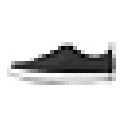

In [75]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[20000], cmap='gray_r')
plt.axis('off')
plt.show()

In [77]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [83]:
x_train2d = x_train.reshape(60000,-1)
x_train2d.shape

(60000, 784)

In [85]:
lr = LogisticRegression(random_state=42)
scores = cross_validate(lr,x_train2d,y_train,n_jobs=-1,return_train_score=True)
np.mean(scores['train_score']),np.mean(scores['test_score'])

(0.8641416666666668, 0.8521833333333333)

In [98]:
pca = PCA(n_components=2)

In [99]:
x_train2d_pca =  pca.fit_transform(x_train2d)

In [100]:
lr = LogisticRegression(random_state=42)
scores = cross_validate(lr,x_train2d_pca,y_train,n_jobs=-1,return_train_score=True)
np.mean(scores['train_score']),np.mean(scores['test_score'])

(0.4839291666666667, 0.4828166666666667)

In [102]:
pca.n_components_, x_train2d_pca.shape

(2, (60000, 2))

In [103]:
km = KMeans(n_clusters=10)
km.fit(x_train2d_pca)

KMeans(n_clusters=10)

In [106]:
np.unique(km.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

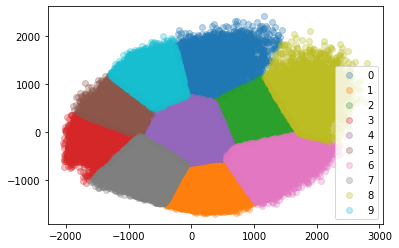

In [108]:
for i in range(10):
    data = x_train2d_pca[km.labels_ == i]
    plt.scatter(data[:,0],data[:,1],alpha=0.3)
plt.legend(np.unique(km.labels_))    
plt.show()

In [109]:
# 인공신경망..... scaled 필요....
x_train.shape

(60000, 28, 28)

In [111]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled =  ss.fit_transform(x_train.reshape(60000,-1))

In [113]:
# 분류.... 훈련,검증
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x_train_scaled,y_train,test_size=0.2,random_state=42)

In [114]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((48000, 784), (12000, 784), (48000,), (12000,))

In [115]:
dense = keras.layers.Dense(10,activation='softmax',input_shape=(784,))

In [116]:
model = keras.Sequential(dense)

In [117]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [118]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5411 - accuracy: 0.8152
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4643 - accuracy: 0.8460
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4508 - accuracy: 0.8514
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4414 - accuracy: 0.8529
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4403 - accuracy: 0.8566


In [119]:
model.evaluate(x_test,y_test)

375/375 [==============================] - 1s 912us/step - loss: 0.5163 - accuracy: 0.8389


[0.5163440108299255, 0.8389166593551636]

In [120]:
# model - fit - score
# dense - sequencial - compile - fit - evaluate

In [121]:
# 인공신경망... 입력층 -> 출력층
# 심층신경망 -- 입력층->은닉층->출력층

In [123]:
dense1 = keras.layers.Dense(100,activation='sigmoid',  input_shape=(784,) )
dense2 = keras.layers.Dense(10,activation='softmax' )

In [124]:
model = keras.Sequential([dense1,dense2])

In [125]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [126]:
# 다중분류시 사용하는 손실함수 sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [127]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4709 - accuracy: 0.8368
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3577 - accuracy: 0.8716
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3211 - accuracy: 0.8851
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2954 - accuracy: 0.8929
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2751 - accuracy: 0.9006


In [128]:
model.evaluate(x_test,y_test)

375/375 [==============================] - 1s 1ms/step - loss: 0.3427 - accuracy: 0.8765


[0.34265783429145813, 0.8765000104904175]

In [129]:
dense1 = keras.layers.Dense(100,activation='sigmoid',  input_shape=(784,) )
dense2 = keras.layers.Dense(50,activation='sigmoid')
dense3 = keras.layers.Dense(10,activation='softmax' )

In [130]:
model = keras.Sequential([dense1,dense2,dense3])

In [131]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [132]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [133]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5661 - accuracy: 0.8200
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3707 - accuracy: 0.8682
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3300 - accuracy: 0.8829
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3026 - accuracy: 0.8919
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2817 - accuracy: 0.8985


In [134]:
model.evaluate(x_test,y_test)

375/375 [==============================] - 1s 1ms/step - loss: 0.3349 - accuracy: 0.8790


[0.3349353075027466, 0.8790000081062317]

In [135]:
# 활성화 함수 - relu
dense1 = keras.layers.Dense(100,activation='relu',  input_shape=(784,) )
dense2 = keras.layers.Dense(50,activation='relu')
dense3 = keras.layers.Dense(10,activation='softmax' )

In [137]:
model = keras.Sequential([dense1,dense2,dense3])

In [139]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [140]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4631 - accuracy: 0.8330
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3613 - accuracy: 0.8722
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3249 - accuracy: 0.8846
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.8931
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2834 - accuracy: 0.8998


In [141]:
model.evaluate(x_test,y_test)

375/375 [==============================] - 1s 1ms/step - loss: 0.4036 - accuracy: 0.8724


[0.40362006425857544, 0.8724166750907898]

In [142]:
model = keras.Sequential([dense1,dense2,dense3])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2113 - accuracy: 0.9229
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1950 - accuracy: 0.9288
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1827 - accuracy: 0.9326
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1759 - accuracy: 0.9352
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1699 - accuracy: 0.9370


In [143]:
model.evaluate(x_test,y_test)

375/375 [==============================] - 1s 1ms/step - loss: 0.3352 - accuracy: 0.8912


[0.335171639919281, 0.8911666870117188]

In [ ]:
model = keras.Sequential([dense1,dense2,dense3])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(x_train,y_train,epochs=20)
model.evaluate(x_test,y_test)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1210 - accuracy: 0.9556
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1153 - accuracy: 0.9565
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1084 - accuracy: 0.9597
Epoch 4/20
1359/1500 [==========================>...] - ETA: 0s - loss: 0.1020 - accuracy: 0.9610